<a href="https://colab.research.google.com/github/Elmermd/Academia-IA/blob/main/Semillero_IAyAA_clase_5_Claes_no_Balanceadas_CFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y NLP**
###Tecnológico de Monterrey
###Prof Fausto Velasco Atilano

### **Clase 5: Actividad clases no balanceadas**
####**Clases no balanceadas**



El obejtivo de cada uno de los ejercicios de esta actividad es que te familiarices con las funciones y la manera de ir construyendo un modelo. Así que no te preocupes si por el momento no se obtienen grandes resultados en cuanto al desempeño se refiere, en las próximas semanas iremos yendo en esta dirección al tener más modelos con qué comparar.

**Recuerda que solamente debes modificar e incluir tu código en las secciones que se te indican explíticamente. Por lo demás, debes dejar todo sin modificar, de lo contrario te restará puntos.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold

Definamos una función que nos ayude a generar los datos desbalanceados de nuestros problemas.

In [12]:
# Generando los conjuntos desbalanceados:
# n: total de registros a generar
# p0: proporción de registros de la clase mayoritaria (valor 0)
# p1: proporción de registros de la clase minoritaria (valor 1)

# Estrictamente solo necesitamos conocer una de las proporciones, ya que la otra
# se obtiene con el complemento; pero estaremos indicando ambas para tener de
# manera clara la partición de las dos clase.

def mis_conjuntos(n, p0, p1):

   X, y = make_classification(
       n_samples=n,             # Se generan "n" registros donde cada factor tiene una distribución gaussiana con varianza 1.
       n_classes=2,             # El conjunto de datos generado constará de dos clases diferentes.
       n_features=2,            # Habrá 2 variables de entrada (factores o variables independientes)
       n_redundant=0,           # No hay factores que sean redundantes, i.e., que uno sea combinación lineal de otros factores.
       n_clusters_per_class=1,  # Cada clase se agrupa alrededor de un centro.
       weights=[p0, p1],        # [proporción_clase_negativa(0), proporción_clase_positiva(1)]
       flip_y=0.0 ,             # Porcentaje de datos mal etiquetados.
       class_sep=0.1,           # Valor que indican la distancia entre clases. Más grande, mayor distancia.
       random_state=0)

   return X,y


##**Ejercicio - 1: Matriz de confusión**

Estaremos requiriendo el despliegue de la matriz de confusión con la información de verdaderos positivos y negativos, así como de los falsos positivos y negativos.



1.   Define una función llamada "mi_mc" cuya salida sea el despliegue una matriz de confusión con la información como se indica en la imagen dada a continuación. Los argumentos de entrada de dicha función serán los arreglos unidimensionales de las observaciones reales "yreal" y las predicciones del modelo "ypred". Para colorearla de acuerdo a los valores numéricos de cada celda, utiliza el mapa de calor "heatmap" de seaborn, con la paleta de colores llamada 'Spectral'.  

NOTA: Los valores numéricos y colores en la matriz de salida obviamente variarán de acuerdo a los datos de entrada de cada ejercicio.

2.   Define una función llamada "mi_recall" que regrese el valor del recall o exhaustividad. Los argumentos de entrada de dicha función serán los arreglos unidimensionales de las observaciones reales "yreal" y las predicciones del modelo "ypred". Utiliza la función confusion_matrix para obtener los verdaderos y falsos positivos o negativos necesarios para calcular el recall.

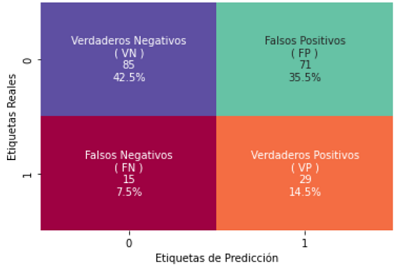

Puedes revisar la documentación de la función "confusion_matrix" de scikit-learn para saber cómo obtener los valores numéricos de los verdaderos y falsos positivos y negativos:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


Y para el heatmap de seaborn:

https://seaborn.pydata.org/generated/seaborn.heatmap.html





```
#           Predictivo
              0       1
         +---------------+
Real  0 |  [0,0]  [0,1]  |
      1 |  [1,0]  [1,1]  |
         +---------------+

```



In [10]:
###############################################################################
###############################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.

# Ejercicio 1.1
# Sustituye "None" por las líneas de código que definan la función con la
# información que se te indica en el Ejercicio 1.
# Se esperarían entre 10 y 14 líneas de código.


def mi_cm(yreal, ypred):

  cm = confusion_matrix(yreal, ypred)
  total = np.sum(cm)
  vn = cm[0,0] # verdadero negativo
  fp = cm[0,1] # falso positivo
  fn = cm[1,0] # falso negativo
  vp = cm[1,1] # verdadero positivo

  etiquetas = [
    [f'Verdaderos Negativos\n(VN)\n{vn}\n{vn / total * 100:.1f}%', f'Falsos Positivos\n(FP)\n{fp}\n{fp / total * 100:.1f}%'],
    [f'Falsos Negativos\n(FN)\n{fn}\n{fn / total * 100:.1f}%', f'Verdaderos Positivos\n(VP)\n{vp}\n{vp / total * 100:.1f}%']
  ]

  sns.heatmap(cm, annot=etiquetas, fmt='', cmap='Spectral', cbar=False,
                xticklabels=["0", "1"], yticklabels=["0", "1"],
                linewidths=5)
  plt.show()





# Ejercicio 1.2
# Sustituye "None" por las líneas de código que definan la función mi_recall
# como se te indica en las instrucciones.
# Se esperarían unas 3 líneas de código.

def mi_recall(yreal, ypred):

  recall = recall_score(yreal, ypred)

  return recall

  None


# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
###############################################################################
###############################################################################



A manera de prueba de la función recién definida verifiquemos su salida con los siguientes arreglos unidimensionales ficticios:

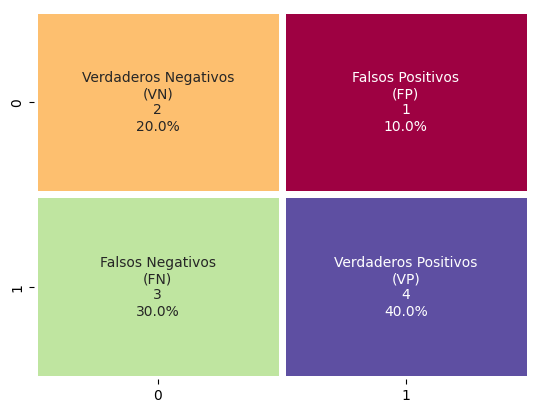

Valor del recall: 0.5714


In [13]:
yreal = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])
ypred = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

mi_cm(yreal, ypred)

print("Valor del recall: %.4f" % mi_recall(yreal, ypred))

### Generemos una distribución de clases binaria de 85% de clase negativa y 15% de la clase positiva con 1,000 registros y con partición en entrenamiento y validación de 80% y 20%, respectivamente:

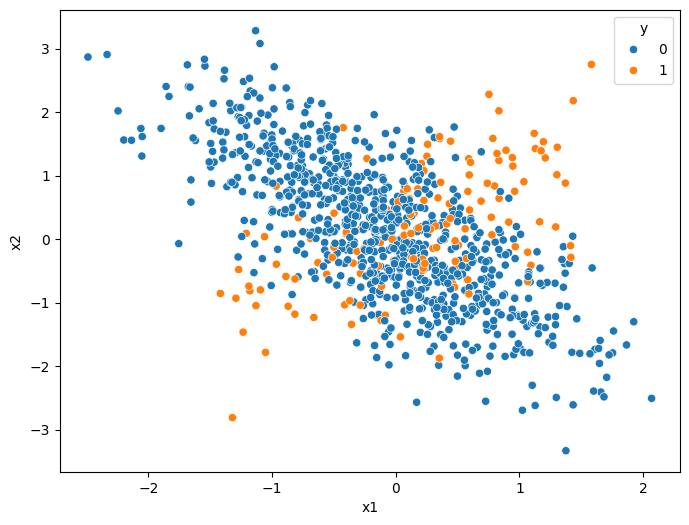

In [14]:
X,y = mis_conjuntos(1000, 0.85, 0.15)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=10)

df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='y');

Como lo hemos comentado, verifiquemos que si entrenamos y generamos el modelo sin ningún tipo de ajuste sobre el desbalanceo de las clases el resultado no será satisfactorio:

Exactitud con datos de Validación: 86.5%


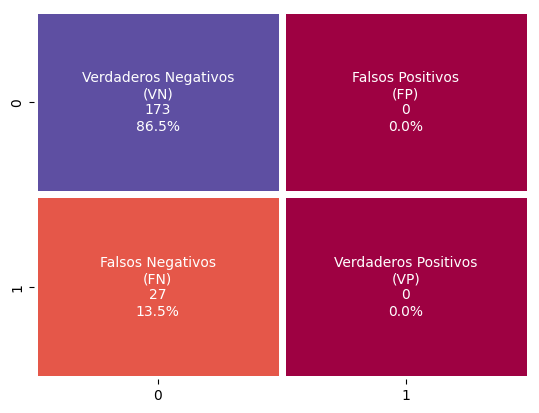

Valor del recall: 0.0000


In [15]:
modelo = LogisticRegression().fit(X_train, y_train)

print('Exactitud con datos de Validación: %.1f%%' % (100*modelo.score(X_val,y_val)))
mi_cm(y_val, modelo.predict(X_val))
print("Valor del recall: %.4f" % mi_recall(y_val, modelo.predict(X_val)))

##**Ejercicio - 2: Balanceo con ponderación de las clases**

Es importante entender la manera en que se balancean los pesos de cada clase durante el proceso de optimización en el entrenamiento.

Comentamos que en particular la librería scickit-learn balancea las clases de acuerdo al valor "balanced" del argumento "class_weight" en la función LogisticRegression de acuerdo a una relación inversa de su distibución y como lo explicamos en el Jupiter-Notebook de esta semana.

El objetivo de este ejercicio será que implementes la fórmula equivalente a la utilizada con argumento "balanced" de "class_weight". Revisa nuevamente el Jupyter-Notebook de esta semana y la documentación correspondiente:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Primero ejecutemos el modelo con el argumento "balanced" para que obtener los resultados a los que deberás llegar:

Exactitud con datos de Validación: 59.5%


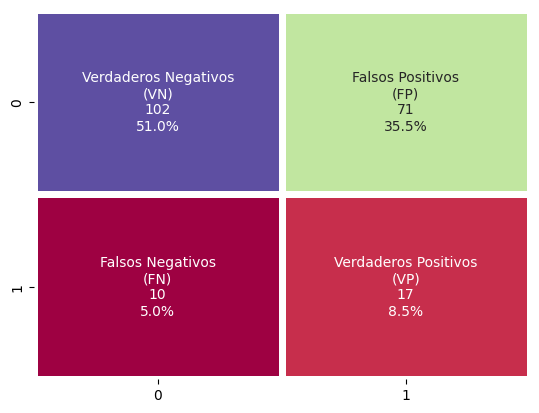

Valor del recall: 0.6296


In [16]:
modelo = LogisticRegression(class_weight='balanced',
                            random_state=0).fit(X_train, y_train)

yhat = modelo.predict(X_val)

print('Exactitud con datos de Validación: %.1f%%' % (100*modelo.score(X_val,y_val)))
mi_cm(y_val, yhat)
print("Valor del recall: %.4f" % mi_recall(y_val, modelo.predict(X_val)))

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

Ejercicio 2:

1.   Define los pesos del argumento "class_weight" de la función LogisticRegression() de scikit-learn, de acuerdo a como se definen con la opción "balanced" y la cual se comenta en la documentación que se define usando los valores de "y" de los datos de entrada para ajustar los pesos de manera inversamente proporcional a las frecuencias de cada clase.

2.   Asigna los pesos definidos a la función LogisticRegression() de scikit-learn a través de su argumento "class_weight".

In [17]:
###############################################################################
###############################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.

# Ejercicio 2.1
# Sustituye "None" por las expresiones de los pesos que balanceen ambas
# clases de la misma manera que hace el argumento "balanced" en "class_weight"
# de la función LogisticRegression() de scikit-learn.
# Recuerda que solo debes incluir tu código en lugar de "None" y no puedes
# modificar el resto del código.

# Agrega aquí tus líneas de código.
# Se esperan de 3 a 8 líneas de código.

None

# Ponderación asignada a la clase negativa:
w0 = None


# Ponderación asignada a la clase positiva:
w1 = None



# Ejercicios 2.2
# Asigna los pesos definidos a cada clase en el argumento "class_weight":
modeloW = LogisticRegression(class_weight = None ,
                             random_state=0)



# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
###############################################################################
###############################################################################


w0 =  None
w1 =  None
Exactitud con datos de Validación: 59.5%


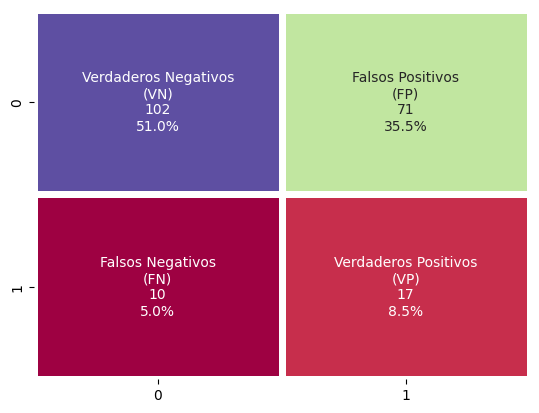

Valor del recall: 0.6296


In [18]:
# Imprimimos los valores de los pesos obtenidos:
print('w0 = ', w0)
print('w1 = ', w1)

# Entrenamos y calculamos las predicciones con el conjunto de validación:
modelo.fit(X_train, y_train)
yhat = modelo.predict(X_val)


# E imprimimos la exactitud, recall y matriz de confusión para verificar los resultados:
print('Exactitud con datos de Validación: %.1f%%' % (100*modelo.score(X_val,y_val)))
mi_cm(y_val, yhat)
print("Valor del recall: %.4f" % mi_recall(y_val, modelo.predict(X_val)))

##**Ejercicio - 3: métrica $G{\text-}mean$**

El siguiente ejercicio es independiente del anterior.


Primeramente importamos lo necesario y definimos un nuevo conjunto de datos con 7,000 registros y una distribución de clases de $90\%$ y $10\%$.

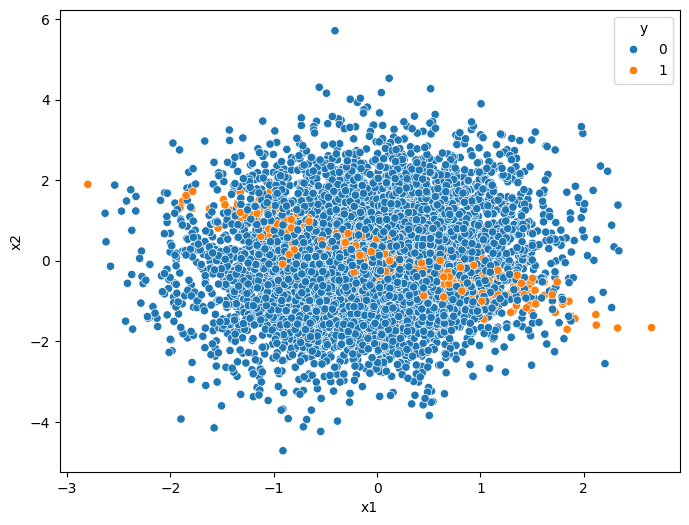

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

X,y = mis_conjuntos(7000, 0.90, 0.10)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=10)

df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='y');

En este ejercicio se requiere que definas una función que calcule la métrica $G{\text-}mean$ que será utilizada para obtener desempeños mínimos del modelo con el clasificador Dummy, utilizando ahora la estrategia "uniform". En esta ocasión no utilizamos la estrategia "stratified" ya que debido al gran desbalanceo de las clases, no se obtendría un buen desempeño con ella (puedes intentarlo para que veas los resultados).

Puedes usar la función "confusion_matrix()" de scikit-learn para obtener los verdaderos y falsos negativos y positivos correspondientes.

Ejercicio 3:

1.   Define la función $G{\text-}mean$ que nos regrese el valor de dicha métrica.  Los argumentos de entrada de dicha función serán los arreglos unidimensionales de las observaciones reales "yreal" y las predicciones del modelo "ypred".


Puedes usar también la función ravel() de Numpy con la función "confusion_matrix()", si así lo deseas:

https://numpy.org/doc/stable/reference/generated/numpy.ravel.ht

In [9]:
def mi_gmean(yreal, ypred):

     ##########################################################################
     ##########################################################################
     # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
     # Ejercicio 3
     # Incluye las líneas de código que calculen el valor de la métrica G-mean.
     # Sustituye None por tus líneas de código.
     # Se esperan en promedio unas 4 líneas de código.

    cm = confusion_matrix(yreal, ypred)
    vn = cm[0,0] # verdadero negativo
    fp = cm[0,1] # falso positivo
    fn = cm[1,0] # falso negativo
    vp = cm[1,1] # verdadero positivo

    sensibilidad = vp / (vp + fn)
    especificidad = vn / (vn + fp)

    gmean = np.sqrt(sensibilidad * especificidad)

    return gmean

     # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
     #########################################################################


Matriz de confusión del modelo Dummy con la estrategia Uniform:


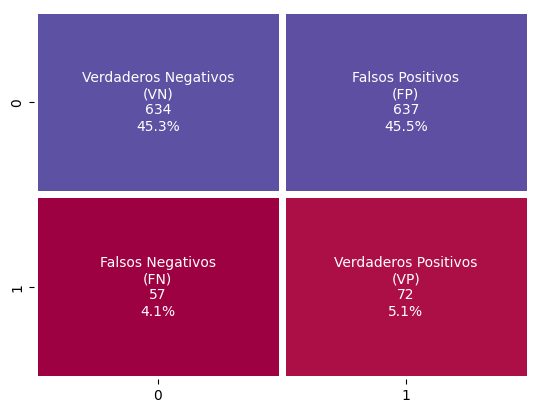

None
Valor de Gmean a superar: 0.5276
Valor del recall a superar: 0.5581


In [20]:
# Ahora obtengamos los resultados:

modeloDummy = DummyClassifier(strategy='uniform', random_state=11)

modeloDummy.fit(X_train, y_train)
yhat = modeloDummy.predict(X_val)

print('Matriz de confusión del modelo Dummy con la estrategia Uniform:')
print(mi_cm(y_val, yhat))

gmean = mi_gmean(y_val, yhat)

print('Valor de Gmean a superar: %.4f' % gmean)
print("Valor del recall a superar: %.4f" % mi_recall(y_val, yhat))

El siguiente ejercicio utiliza el mismo conjunto de datos y utilizaremos este valor de $G{\text-}mean$ como valor de partida.

# Investigación: Modelos de submuestreo y sobremuestreo
El **sobremuestreo** (oversampling) es una técnica de aumento de datos utilizada cuando se trabaja con conjuntos de datos desequilibrados, en los que la clase mayoritaria domina a la clase minoritaria. Esta técnica equilibra la distribución de las clases aumentando el número de muestras de la clase minoritaria.


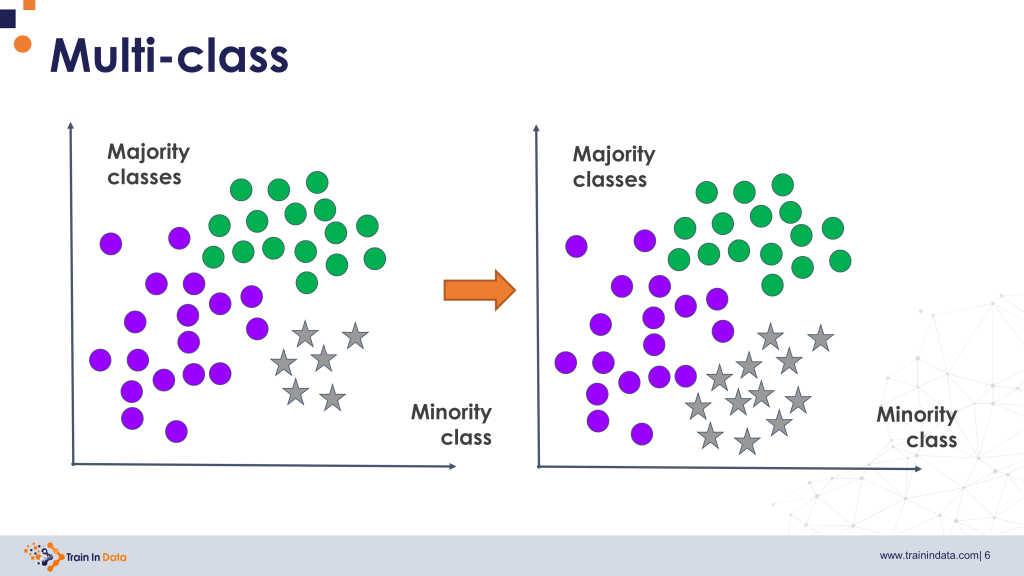

## Random Oversampling
El sobremuestreo aleatorio selecciona aleatoriamente muestras existentes de la clase minoritaria y las duplica para equilibrar el conjunto de datos. En otras palabras, el sobremuestreo aleatorio duplica puntos de datos de la clase minoritaria de forma aleatoria.
## SMOTE (Synthetic Minority Oversampling Technique)
SMOTE, que significa Synthetic Minority Oversampling Technique, es un método de sobremuestreo popular utilizado para abordar el desequilibrio de clases en el aprendizaje automático.

La idea principal detrás del algoritmo SMOTE es generar puntos de datos sintéticos de la clase minoritaria interpolando entre instancias existentes de dicha clase. En otras palabras, SMOTE crea nuevos datos de manera artificial.

Para lograr esto, SMOTE selecciona aleatoriamente una instancia de la clase minoritaria y luego encuentra sus k vecinos más cercanos, también de la clase minoritaria. Después, genera nuevas instancias sintéticas interpolando entre la instancia original y sus vecinos más cercanos.
- Selecciona datos aleatorios de la clase minoritaria.
- Calcula la distancia euclidiana entre esos datos aleatorios y sus k vecinos más cercanos.
- Multiplica la diferencia entre ellos por un número aleatorio entre 0 y 1, y luego suma el resultado al punto original para generar una muestra sintética.
- Repite este procedimiento hasta alcanzar la proporción deseada de la clase minoritaria.

## Tomek Links
El método de Tomek Links utiliza una regla específica para seleccionar pares de observaciones (digamos, a y b) que cumplen con estas condiciones:

- El vecino más cercano de la observación a es b.

- El vecino más cercano de la observación b es a.

Las observaciones a y b pertenecen a clases diferentes; es decir, a y b pertenecen, respectivamente, a la clase minoritaria y a la clase mayoritaria (o viceversa).

Estos pares se consideran Tomek Links, y se utilizan comúnmente para limpiar los bordes entre clases. Al eliminar los ejemplos de la clase mayoritaria en estos pares, se mejora la separación entre clases y se reduce el solapamiento.

## SMOTEEN
###¿Qué es SMOTE?
SMOTE (Synthetic Minority Oversampling Technique) genera muestras sintéticas para la clase minoritaria mediante la interpolación entre muestras existentes. En lugar de simplemente duplicar instancias, SMOTE crea nuevas muestras seleccionando puntos aleatorios entre una muestra de la clase minoritaria y sus vecinos más cercanos. Esto ayuda al modelo a aprender mejor al reducir el desequilibrio entre clases.

###¿Qué es ENN?
Edited Nearest Neighbors (ENN) es una técnica de limpieza de datos. Funciona eliminando muestras ruidosas o mal clasificadas, tanto de la clase mayoritaria como de la minoritaria. En concreto, analiza los vecinos más cercanos de una muestra, y si la mayoría de ellos la clasifica de forma diferente, se considera ruido y se elimina del conjunto de datos. ENN mejora la calidad del conjunto de datos al reducir el sobreajuste y mejorar la capacidad de generalización del modelo.

###¿Cómo funciona SMOTE-ENN?
SMOTE-ENN combina las fortalezas de ambos métodos:

- Primero se aplica SMOTE para sobremuestrear la clase minoritaria mediante la creación de nuevas instancias sintéticas.

- Luego se aplica ENN para limpiar el conjunto de datos eliminando muestras ruidosas o que se solapan entre clases.

Este proceso en dos pasos no solo aumenta la representación de la clase minoritaria, sino que también mejora la calidad del conjunto de datos, haciéndolo más representativo de los patrones subyacentes y facilitando un aprendizaje más robusto por parte del modelo.

##**Ejercicio - 4: definiendo los modelos de submuestreo y sobremuestreo a implementar**

En este ejercicio utilizaremos solamente 4 modelos en total de submuestreo y sobremuestreo: RandomOversampling, TomekLinks, SMOTE y SMOTEENN.




In [21]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline

Ejercicio 4:

1.   Define una lista con los nombres y métodos de submuestreo y sobremuestreo que se indican a continuación y en este orden: Random-Oversampling, Tomek-links, SMOTE y SMOTEEN.




In [22]:
##########################################################################
##########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 4.1
# Incluye las líneas de código para incluir las funciones de submuestreo o
# sobremustreo indicada, así como sus nombres.
# Sustituye None por tus líneas de código.
# Se esperan dos líneas de código en cada None.

def get_models_underoversampling():
  modelos, nombres = list(), list()

  # técnica y nombre: RandOver
  modelos.append(RandomOverSampler())
  nombres.append('RandOver')

  # técnica y nombre: TomekLinks
  modelos.append(TomekLinks())
  nombres.append('TomekLinks')

  # técnica y nombre: SMOTE
  modelos.append(SMOTE())
  nombres.append('SMOTE')

  # técnica y nombre: SMOTEENN
  modelos.append(SMOTEENN())
  nombres.append('SMOTEENN')


  return modelos, nombres

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

##**Ejercicio - 5: Entrenamiento con modelos sub y sobre muestreo**



En este caso usaremos la métrica $G{\text-}mean$ y $recall$ para compararlos.

Además, aplicaremos validación cruzada.

Deberás incluir las líneas de código necesarias para llevar a cabo el entrenamiento del modelo de regresión lineal con cada una de las cuatro técnicas de subentrenamiento y sobreentrenamiento que incluiste previamente.

En el entrenamiento deberás utilizar las métricas $accuracy$ y las $G{\text-}mean$  y $recall$ que definiste previamente como "mi_gmean" y "mi_recall".

Además, deberás utilizar la función "cross_validate()". Puedes apoyarte en el JupyterNotebook de esta semana.


In [24]:
modelosOU, nombres = get_models_underoversampling()
resultados = list()

for i in range(len(modelosOU)):

  model = LogisticRegression(class_weight='balanced')
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipe = make_pipeline((modelosOU[i]), (model))


  #########################################################################
  #########################################################################
  # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
  # Ejercicio 5
  # Utiliza las métricas Accuracy, mi_Gmean y mi_Recall para entrenar
  # el modelo con los conjuntos "X" y "y" y cv=kfold. Guarda los
  # resultados y nombres en las variables correspondientes.
  # Sustituye "None" por tus líneas de código dentro de esta región.
  # Se espera 1 línea de código en cada None.

  # Ejercicio 5.1:
  mismetricas = {'accuracy': 'accuracy','g_mean': make_scorer(mi_gmean), 'recall': make_scorer(mi_recall)}

  # Ejercicio 5.2:
  resultadosOU = cross_validate(pipe, X, y, scoring=mismetricas, cv=kfold)

  # Ejercicio 5.3:
  # agregando resultados a la lista:
  resultados.append(resultadosOU)


  # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
  #########################################################################





  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']),
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_g_mean']),
                                                                          np.std(resultadosOU['test_g_mean']),
                                                                          ))


RandOver:
mean Accuracy: 0.559 (0.0133)
mean Recall: 0.561 (0.0510)
Gmean: 0.560 (0.0263)

TomekLinks:
mean Accuracy: 0.557 (0.0126)
mean Recall: 0.567 (0.0415)
Gmean: 0.561 (0.0211)

SMOTE:
mean Accuracy: 0.560 (0.0081)
mean Recall: 0.565 (0.0511)
Gmean: 0.561 (0.0226)

SMOTEENN:
mean Accuracy: 0.559 (0.0092)
mean Recall: 0.557 (0.0333)
Gmean: 0.558 (0.0164)



In [25]:
resultados

[{'fit_time': array([0.03049994, 0.02207899, 0.02839184, 0.02763486, 0.03068805,
         0.04406571, 0.0582583 , 0.03501868, 0.03380418, 0.04296613,
         0.0280273 , 0.03870344, 0.02734303, 0.02775455, 0.02728963]),
  'score_time': array([0.01689792, 0.0150001 , 0.007447  , 0.01434302, 0.02899861,
         0.02712798, 0.00802445, 0.01626587, 0.01618624, 0.02304292,
         0.01599813, 0.01548648, 0.01554775, 0.0145905 , 0.03185129]),
  'test_accuracy': array([0.54785714, 0.56571429, 0.56714286, 0.55214286, 0.56142857,
         0.57      , 0.575     , 0.55928571, 0.55785714, 0.535     ,
         0.585     , 0.555     , 0.56      , 0.565     , 0.53285714]),
  'test_g_mean': array([0.5190913 , 0.60705882, 0.57530432, 0.54150835, 0.54652064,
         0.58614483, 0.58594653, 0.52499865, 0.53457551, 0.56853434,
         0.58531733, 0.56839472, 0.55552778, 0.57409102, 0.52123284]),
  'test_recall': array([0.48571429, 0.66428571, 0.58571429, 0.52857143, 0.52857143,
         0.60714286, 0

1.   Define la lista de las métricas a utilizar: accuracy, gmean y recall, donde gmean y recall deben ser las funciones que tú definiste previamente.

2.   Realiza el entrenamiento con la función "cross_validate()" de scikit-learn.

3.   Agrega el resultado y nombre de cada modelo entrenado a la lista correspondiente.

Puedes consutlar la siguiente documentación:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

Por la variabilidad de la validación cruzada puedes obtener resultados algo diferentes en cada ejecución. Y como comentamos previamente, por el momento la mejora puede ser mínima.


##**Ejercicio - 6: Diagramas de caja**


Finalmente incluye los diagramas de caja (boxplots) de los cuatro modelos entrenados. En general se obtuvieron mejores resultados con la métrica $recall$, por lo que se graficarán estos resultados para los conjuntos de validación.

NOTA: "cross_validate()" le llama en general "test" a los resultados obtenidos con el conjunto de validación.

<ipython-input-48-81542e6fe8a7>:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(recalls_bp,labels=nombres,showmeans=True)


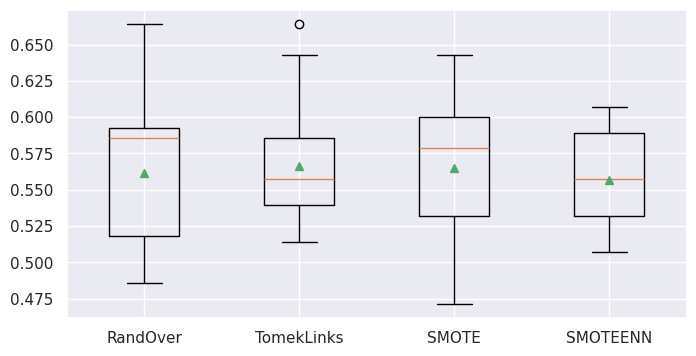

In [48]:
sns.set(rc={'figure.figsize':(8,4)})

#########################################################################
#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 6
# Incluir el diagrama de caja de cada modelo de los resultados obtenidos
# con la métrica Recall.
# Sustituye None por las líneas de código.
# Se esperan unas 5 líneas de código aproximadamente.

recalls_bp = list()

for i in range(len(resultados)):
  recall_values = resultados[i]['test_recall']
  recalls_bp.append(recall_values)

plt.boxplot(recalls_bp,labels=nombres,showmeans=True)

#

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

In [38]:
print(classification_report(y_val, yhat))

print(classification_report_imbalanced(y_val,yhat))

              precision    recall  f1-score   support

           0       0.92      0.50      0.65      1271
           1       0.10      0.56      0.17       129

    accuracy                           0.50      1400
   macro avg       0.51      0.53      0.41      1400
weighted avg       0.84      0.50      0.60      1400

                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.50      0.56      0.65      0.53      0.28      1271
          1       0.10      0.56      0.50      0.17      0.53      0.28       129

avg / total       0.84      0.50      0.55      0.60      0.53      0.28      1400



##**Ejercicio - 7: CONCLUSIONES FINALES:**

Todos los métodos presentan un rendimiento muy similar, con diferencias marginales en accuracy, recall y G-mean. SMOTE y TomekLinks destacan ligeramente por su mejor equilibrio y estabilidad, mientras que SMOTEENN muestra el desempeño más débil. En general, todas muestran trabajar correctamente, pero SMOTE parece ser la opción más confiable por su consistencia en todas las métricas

###**Fin de los ejercicios de la semana 5**